 # Defines

 ## Libraries

In [1]:
import pickle

import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# show all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

 ## Data

In [2]:
# Load data
with open("output/data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
y_train_true = data["y_train_true"]
y_train_compas = data["y_train_compas"]
X_test = data["X_test"]
y_test_true = data["y_test_true"]
y_test_compas = data["y_test_compas"]

# Load model
with open("output/model.pkl", "rb") as f:
    model = pickle.load(f)

In [3]:
protected_features = ["is_black", "is_male", "age"]

In [4]:
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train_compas shape:", y_train_compas.shape)
print("y_test_compas shape:", y_test_compas.shape)

print("y_train_true shape:", y_train_true.shape)
print("y_test_true shape:", y_test_true.shape)

X_train shape: (4937, 9)
X_test shape: (1235, 9)
y_train_compas shape: (4937,)
y_test_compas shape: (1235,)
y_train_true shape: (4937,)
y_test_true shape: (1235,)


In [5]:
pipeline = Pipeline(steps=[("model", model)])
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

continuous_features = list(X_test.columns)

THRESHOLD = 0.5

In [6]:
# read cf_resuls_df file
with open("output/cf_results_df.pkl", "rb") as f:
    cf_results_df = pickle.load(f)

In [7]:
cf_results_df.head(20)

,is_male,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_felony,is_black,y_pred,cf_y_pred_proba,cf_y_pred,original_index,original_is_black,original_y_pred,original_y_pred_proba
0,1.0,26.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.497329,0,2681,1,1.0,0.650344
1,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.379920,0,2681,1,1.0,0.650344
2,1.0,26.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0,0.383554,0,2681,1,1.0,0.650344
3,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.347113,0,2681,1,1.0,0.650344
4,1.0,62.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0,0.497334,0,2681,1,1.0,0.650344
5,1.0,31.0,0.0,1.0,7.0,9.0,0.0,0.0,0.0,1,0.660983,1,2164,0,0.0,0.401980
6,1.0,31.0,0.0,1.0,0.0,17.0,0.2,0.0,0.0,1,0.627024,1,2164,0,0.0,0.401980
7,1.0,31.0,0.0,1.0,0.0,16.0,0.0,0.0,0.0,1,0.627024,1,2164,0,0.0,0.401980
8,1.0,31.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,1,0.612361,1,2164,0,0.0,0.401980
9,1.0,31.0,0.0,6.0,0.0,30.0,0.0,0.0,0.0,1,0.634496,1,2164,0,0.0,0.401980


## General Analysis

In [8]:
cf_results_df.original_y_pred_proba.mean()

0.4534354713040325

## Counterfactual fairness analysis

In [9]:
# Count cases where is_black in counterfactuals is different from the original
cf_with_is_black_change = cf_results_df[
    cf_results_df["is_black"] != cf_results_df["original_is_black"]
]
num_cases_with_is_black_change = cf_with_is_black_change["original_index"].nunique()
print(
    f"Number of cases with counterfactual samples using is_black: {num_cases_with_is_black_change}"
)


Number of cases with counterfactual samples using is_black: 370


In [10]:
cf_results_df.original_index.nunique()

1235

In [11]:
cf_with_is_black_change.shape, cf_results_df.shape

((420, 16), (6175, 16))

In [12]:
370/1235

0.29959514170040485

In [13]:
420/6175

0.0680161943319838

In [14]:
cf_with_is_black_change.head(2)

,is_male,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_felony,is_black,y_pred,cf_y_pred_proba,cf_y_pred,original_index,original_is_black,original_y_pred,original_y_pred_proba
3,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.347113,0,2681,1,1.0,0.650344
4,1.0,62.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0,0.497334,0,2681,1,1.0,0.650344


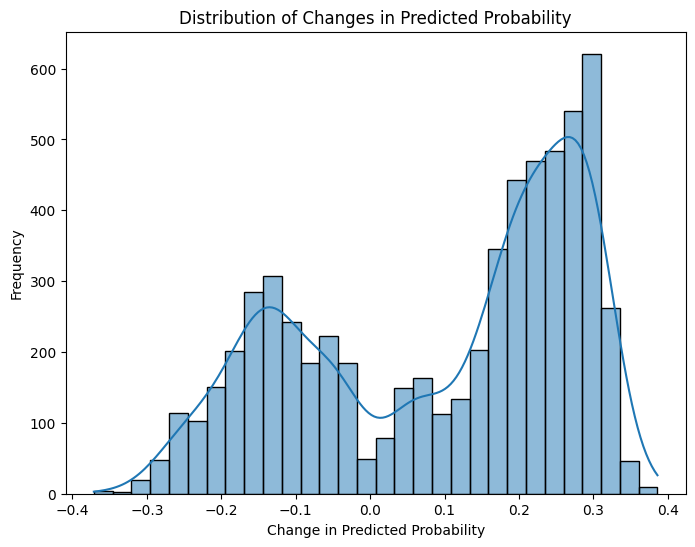

In [15]:
cf_results_df["change_in_proba"] = (
    cf_results_df["cf_y_pred_proba"] - cf_results_df["original_y_pred_proba"]
)

# Plot distribution of changes in predicted probability
plt.figure(figsize=(8, 6))
sns.histplot(cf_results_df["change_in_proba"], kde=True, bins=30)
plt.title("Distribution of Changes in Predicted Probability")
plt.xlabel("Change in Predicted Probability")
plt.ylabel("Frequency")
plt.show()


In [16]:
cf_results_df.original_is_black.value_counts()

original_is_black
0    3105
1    3070
Name: count, dtype: int64

In [24]:
# Step 1: Identify instances where `is_black` changed
changed_is_black_to_1_df = cf_results_df[
    (cf_results_df["original_is_black"] == 0) & (cf_results_df["is_black"] == 1)
].copy()
changed_is_black_to_0_df = cf_results_df[
    (cf_results_df["original_is_black"] == 1) & (cf_results_df["is_black"] == 0)
].copy()

print(
    'mean of changed_is_black_to_1_df["change_in_proba"]:',
    changed_is_black_to_1_df["change_in_proba"].mean(),
)
print(
    'mean of changed_is_black_to_0_df["change_in_proba"]:',
    changed_is_black_to_0_df["change_in_proba"].mean(),
)

# Combine the data for plotting
changed_is_black_to_1_df["change_direction"] = "0 to 1"
changed_is_black_to_0_df["change_direction"] = "1 to 0"
combined_df = pd.concat([changed_is_black_to_1_df, changed_is_black_to_0_df])

# Step 3: Visualize the distribution of changes in predicted probability using Plotly
fig = px.histogram(
    combined_df,
    x="change_in_proba",
    color="change_direction",
    nbins=30,
    title="Distribution of Changes in Predicted Probability When `is_black` Changed",
    labels={"change_in_proba": "Change in Predicted Probability"},
)

# Update the color for the specific case
fig.update_traces(
    marker=dict(color="blue", opacity=0.3),  # Default color for "0 to 1"
    selector=dict(name="0 to 1"),
)
fig.update_traces(
    marker=dict(color="red", opacity=0.3),  # Color for "1 to 0"
    selector=dict(name="1 to 0"),
)

fig.update_layout(
    xaxis_title="Change in Predicted Probability",
    yaxis_title="Frequency",
    legend_title="Change Direction",
    width=1000,  # specify the width in pixels
    height=600,  # specify the height in pixels

)


fig.show()

mean of changed_is_black_to_1_df["change_in_proba"]: 0.1706675420636716
mean of changed_is_black_to_0_df["change_in_proba"]: 0.013190076944413879


In [18]:
y_pred_changed_df = cf_results_df.loc[
    (cf_results_df.original_y_pred != cf_results_df.cf_y_pred)
    & (cf_results_df.original_is_black != cf_results_df.is_black)
]
y_pred_changed_df.shape

(420, 17)

In [19]:
# pivot cf_results_df, get counts of : columns: is_black changes from 0 to 1, 1 to 0, rows: original_y_pred, cf_y_pred
cf_results_df_pivot = y_pred_changed_df.pivot_table(
    index="cf_y_pred",
    columns=["is_black"],
    values="original_index",
    aggfunc="count",
    fill_value=0,
)
cf_results_df_pivot

is_black,0.0,1.0
cf_y_pred,,
0,114,32
1,99,175


In [20]:
cf_results_df.shape

(6175, 17)

In [21]:
420/1235

0.340080971659919